 EBOLA DATASET

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
path = '/home/bartleyby/Desktop/DATA ANALYTICS/Python/PY.Ebola/country_timeseries.csv'
ebola = pd.read_csv(path)

In [102]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [103]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
ebola.shape

(122, 18)

In [105]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [106]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

unpivot the data from wide to long

In [107]:
ebola_long = pd.melt(ebola,
                    id_vars=['Date', 'Day'])

In [108]:
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [109]:
'Cases_Guinea'.split('_')

['Cases', 'Guinea']

In [110]:
variable_split = ebola_long['variable'].str.split('_')
variable_split


0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [111]:
type(variable_split)

pandas.core.series.Series

In [112]:
type(variable_split[0])
#['cases','Guinea']

list

In [113]:
(variable_split[0][0])

'Cases'

In [114]:
type(variable_split[0][0])

str

In [115]:
variable_split.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [116]:
variable_split.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [117]:
#creating the columns for two
ebola_long['stats'] = variable_split.str.get(0)
ebola_long['country'] = variable_split.str.get(1)

In [118]:
ebola_long.head()

,Date,Day,variable,value,stats,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [119]:
ebola_long.head(1)

,Date,Day,variable,value,stats,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea


In [120]:
ebola_long.shape

(1952, 6)

In [121]:
ebola_long['Date'] = ebola_long['Date'].astype(dtype='datetime64[Y]') 

In [122]:
ebola_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1952 non-null   datetime64[ns]
 1   Day       1952 non-null   int64         
 2   variable  1952 non-null   object        
 3   value     738 non-null    float64       
 4   stats     1952 non-null   object        
 5   country   1952 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 91.6+ KB


In [123]:
#droping null values
ebola_long =ebola_long.dropna()
ebola_long

,Date,Day,variable,value,stats,country
0,2015-01-01,289,Cases_Guinea,2776.0,Cases,Guinea
1,2015-01-01,288,Cases_Guinea,2775.0,Cases,Guinea
2,2015-01-01,287,Cases_Guinea,2769.0,Cases,Guinea
4,2014-01-01,284,Cases_Guinea,2730.0,Cases,Guinea
5,2014-01-01,281,Cases_Guinea,2706.0,Cases,Guinea
...,...,...,...,...,...,...
1856,2014-01-01,227,Deaths_Mali,1.0,Deaths,Mali
1858,2014-01-01,225,Deaths_Mali,1.0,Deaths,Mali
1860,2014-01-01,220,Deaths_Mali,1.0,Deaths,Mali
1861,2014-01-01,218,Deaths_Mali,1.0,Deaths,Mali


In [124]:
ebola_long.drop_duplicates()
data = ebola_long[['Date','Day','country','stats','value']]
data

,Date,Day,country,stats,value
0,2015-01-01,289,Guinea,Cases,2776.0
1,2015-01-01,288,Guinea,Cases,2775.0
2,2015-01-01,287,Guinea,Cases,2769.0
4,2014-01-01,284,Guinea,Cases,2730.0
5,2014-01-01,281,Guinea,Cases,2706.0
...,...,...,...,...,...
1856,2014-01-01,227,Mali,Deaths,1.0
1858,2014-01-01,225,Mali,Deaths,1.0
1860,2014-01-01,220,Mali,Deaths,1.0
1861,2014-01-01,218,Mali,Deaths,1.0


In [125]:

pd.unique(data['stats'])

array(['Cases', 'Deaths'], dtype=object)

In [126]:
pd.unique(data['country'])

array(['Guinea', 'Liberia', 'SierraLeone', 'Nigeria', 'Senegal',
       'UnitedStates', 'Spain', 'Mali'], dtype=object)

Summary statistics

In [127]:
#descriptive statistics for the dataset
data['value'].describe()

count      738.000000
mean       937.913279
std       1825.685590
min          0.000000
25%          5.000000
50%        142.000000
75%        940.500000
max      10030.000000
Name: value, dtype: float64

In [128]:
#descriptive statistics for cases in the dataset
data[data['stats']  == 'Cases']['value'].describe()

count      372.000000
mean      1318.610215
std       2360.041913
min          0.000000
25%          7.000000
50%        185.000000
75%       1436.000000
max      10030.000000
Name: value, dtype: float64

coefficient of variation CASES 

In [129]:
cv= data[data['stats']  == 'Cases']['value'].std() /data[data['stats']  == 'Cases']['value'].mean() 
cv*100

178.97949565110045

#The STD is 179% of the mean

In [130]:
#descriptive statistics for deaths in the dataset
data[data['stats']  == 'Deaths']['value'].describe()

count     366.000000
mean      550.975410
std       878.055721
min         0.000000
25%         4.000000
50%       112.000000
75%       630.000000
max      3496.000000
Name: value, dtype: float64

Coefficient of variation DEATHS

In [131]:
cv_deaths= data[data['stats']  == 'Deaths']['value'].std() /data[data['stats']  == 'Deaths']['value'].mean() 
cv*100

178.97949565110045

#The STD is 179% of the mean

In [132]:
cv= data[data['stats']  == 'Cases']['value'].std() /data[data['stats']  == 'Cases']['value'].mean() 


In [133]:
data[['country','stats']].value_counts()

country       stats 
Guinea        Cases     93
              Deaths    92
SierraLeone   Cases     87
              Deaths    87
Liberia       Cases     83
              Deaths    81
Nigeria       Cases     38
              Deaths    38
Senegal       Cases     25
              Deaths    22
UnitedStates  Cases     18
              Deaths    18
Spain         Cases     16
              Deaths    16
Mali          Cases     12
              Deaths    12
dtype: int64

Graphical EDA

In [134]:
data.groupby('stats')['value'].sum()

stats
Cases     490523.0
Deaths    201657.0
Name: value, dtype: float64

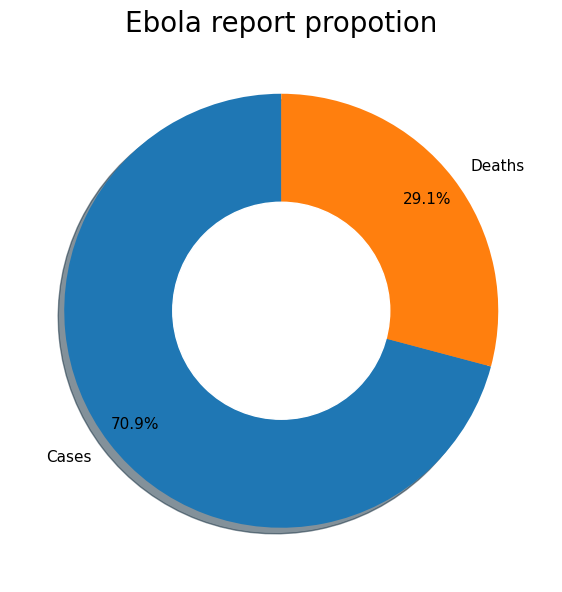

In [135]:
#data[data['stats']  == 'Cases']['value']. sum() 
  
df = data.groupby('stats')['value'].sum()
labels = data["stats"].unique()
plt.figure(figsize=(7,11))
plt.pie(df, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=11)
plt.title("Ebola report propotion", fontsize=20)
plt.show()

In [136]:
data.groupby('country')['value'].sum() .sort_values()
 

country
Spain               19.0
Senegal             27.0
UnitedStates        74.0
Mali                80.0
Nigeria            869.0
Guinea          136547.0
SierraLeone     271533.0
Liberia         283031.0
Name: value, dtype: float64

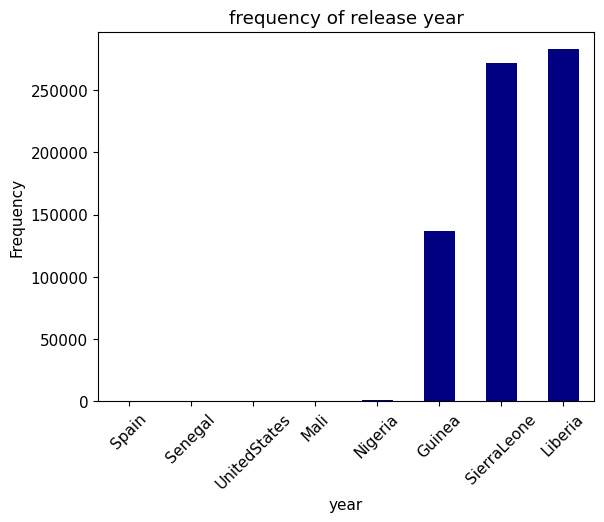

In [137]:
q  = data.groupby('country')['value'].sum() .sort_values()
q.plot(kind='bar',color = 'navy')
plt.title('frequency of release year')
plt.ylabel('Frequency')
plt.xlabel('year')
plt.xticks(rotation = 45)
plt.show()

Liberia has the highest number of ebola virus report in 289 days of records
The result also depicts outliers in our dataset

In [138]:
#cases dataset
data_cases= data[data['stats']  == 'Cases'] 
data_cases 

,Date,Day,country,stats,value
0,2015-01-01,289,Guinea,Cases,2776.0
1,2015-01-01,288,Guinea,Cases,2775.0
2,2015-01-01,287,Guinea,Cases,2769.0
4,2014-01-01,284,Guinea,Cases,2730.0
5,2014-01-01,281,Guinea,Cases,2706.0
...,...,...,...,...,...
880,2014-01-01,227,Mali,Cases,1.0
882,2014-01-01,225,Mali,Cases,1.0
884,2014-01-01,220,Mali,Cases,1.0
885,2014-01-01,218,Mali,Cases,1.0


In [139]:
data_cases.groupby('country')['value'].sum() .sort_values()

country
Spain               16.0
Senegal             27.0
Mali                42.0
UnitedStates        59.0
Nigeria            636.0
Guinea           84729.0
Liberia         193833.0
SierraLeone     211181.0
Name: value, dtype: float64

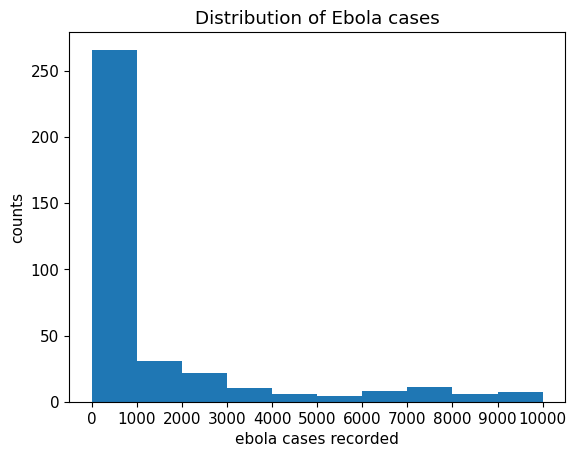

In [140]:
bin_edges = [x for x in range(0, 11000, 1000)]
plt.hist(data_cases['value'],bins =bin_edges )
plt.xticks(bin_edges)
plt.title("Distribution of Ebola cases")
plt.xlabel('ebola cases recorded')
plt.ylabel('counts')
plt.show()

distribution of ebola cases is skewed to the right

In [141]:
#Ebola deaths
data_deaths= data[data['stats']  == 'Deaths']
data_deaths

,Date,Day,country,stats,value
976,2015-01-01,289,Guinea,Deaths,1786.0
977,2015-01-01,288,Guinea,Deaths,1781.0
978,2015-01-01,287,Guinea,Deaths,1767.0
980,2014-01-01,284,Guinea,Deaths,1739.0
981,2014-01-01,281,Guinea,Deaths,1708.0
...,...,...,...,...,...
1856,2014-01-01,227,Mali,Deaths,1.0
1858,2014-01-01,225,Mali,Deaths,1.0
1860,2014-01-01,220,Mali,Deaths,1.0
1861,2014-01-01,218,Mali,Deaths,1.0


In [142]:
data_deaths.groupby('country')['value'].sum() .sort_values()

country
Senegal             0.0
Spain               3.0
UnitedStates       15.0
Mali               38.0
Nigeria           233.0
Guinea          51818.0
SierraLeone     60352.0
Liberia         89198.0
Name: value, dtype: float64

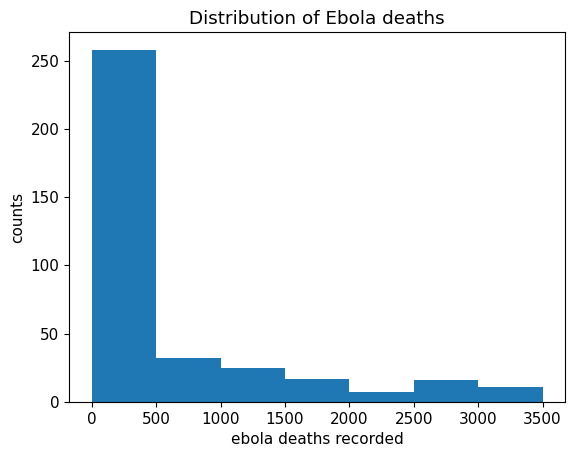

In [143]:
bin_edges = [x for x in range(0, 4000, 500)]
plt.hist(data_deaths['value'],bins =bin_edges )
plt.xticks(bin_edges)
plt.title("Distribution of Ebola deaths")
plt.xlabel('ebola deaths recorded')
plt.ylabel('counts')
 
plt.show()

distribution of ebola deaths is skewed to the right

Relationships

In [ ]:
#